In [1]:
#checking the configuration
import sys
assert sys.version_info >=(3,5)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Training and Visualizing Decision Tree

In [2]:
#loading dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #petal length
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
import os

#making images dir
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,  CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

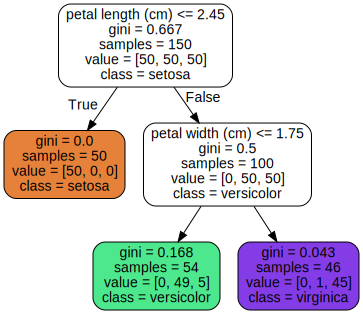

In [10]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names= iris.target_names,
    rounded = True,
    filled= True
)

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## Prediction Tree Representation -  
- At the root node ***(depth 0 at the top)***, it asks whether flower's petal length <= 2.45, if it is, we can move down to root's left child node (depth 1, left). In this case it's a leaf node (i.e. does not have any children nodes). So DCT predicts it's Iris-setosa  
- Now for next flower suppose petal lenght > 2.45 cm, we must move down to the root's right child node ***(depth 1, right)***, which is not a leaf node, so it asks another question: Is the petal width <=1.75 cm, if it is then our flower is mostly Iris-versicolor ***(depth 2, left)*** or if not then Iris-viriginica ***(depth 2, right)***  
- A node's ***samples*** attribute counts how many training instances it applies to, for example, *100 training instances have petal length > 2.45 cm (depth 1 ,right), among which 54 have petal width <= 1.7 cm (depth 2, left)*.
- A node's ***value*** attribute tells us how many training instances of each class this node applies to, for ex. *bottom right node applies to 0 Iris-setosa, 1 Iris-versicolor and 45 Iris-virginica*.
- A node's ***gini** attribute measures impurity. A node is "pure" (gini=0) if all training instances it applies to belong to the same class.  
> **Gini Score:** 
> $G_i = 1 - \sum\limits_{ k=1}^{n} {(p_{i,k})}^2$
> - $p_{i,k}$  is the ratio of class k instances among the training instances in the $i^{th}$ node.
> - $G_i$ is the gini score of the $i^{th}$ node.
> Ex.depth 2 left node has gini score  = $1 - (\frac{0}{54})^2 - (\frac{49}{54})^2 - (\frac{5}{54})^2 = 0.168$

Decision Tree's require very little feature preparation and don't require feature scaling or centering at all.

- <mark>Scikit-learn uses **CART** algorithm which produces binary trees; nonleaf nodes always have two children (i.e. questions only have answers yes/no).</mark>
- <mark>However, other algorithms such as **ID3** can produce Decision Trees with nodes that have more than two children</mark>

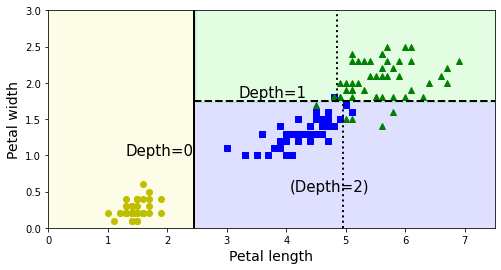

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_boundry(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training= True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[: ,1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[: ,1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
        
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel("$x_1$", fontsize=18)
        plt.ylabel("$x_2$", fontsize=18, rotation=0)
        
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
plt.figure(figsize=(8,4))
plot_decision_boundry(tree_clf , X, y)
plt.plot([2.45, 2.45], [0,3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

plt.text(1.30, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=15)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=15)
plt.show()

- The thick verticle line represents decision boundry of the root node (depth 0): petal length = 2.45cm.  
- Since the left area is pure (only Iris-Setosa), it cannit be split any further. 
- However, right area is impure, so the depth-1 right node splits it at petal width = 1.75cm (dashed line). Since max_depth was was set to 2, DCT would stop rigth there.  
- However, if we set max_depth=3, then two depth-2 nodes would each add another decision boundry (dotted lines).  
<br>
<br>  

## Estimating Class Probabilites
ex. If flower has petal length =5cm and petal width = 1.5cm, decision tree identifies it's corrosponding leaf node in depth 2 (depth 2 ,right here) and returns probabilities,
0% (0/54) for Iris-setosa, 90.7% (49/54) for Iris-versicolor and 9.3% (5/54) for Iris-virginica.  
So estimated probabilites will be identical anywhere else in the bottom-right rectangle of above plot.

In [19]:
tree_clf.predict_proba([[5, 1.5]]) 

array([[0.        , 0.90740741, 0.09259259]])

In [20]:
tree_clf.predict([[5,1.5]])

array([1])

## The CART Training Algorithm
Classification and Regression Tree also called as growing trees.

**Purpose:**
- Split training set using single feature k and thereshold $t_k$ by finding pair $(k, t_k)$ that produces purest subsets (weighted by their size).
> **Cost Function:** <br><br>
> $J(k ,t_k) = \frac{m_{left}}{m} * G_{left} + \frac{m_{right}}{m} * G_{right}$  <br><br>
> Where, $G_{left/right}$ - measures of impurities of left/right subset,  
> $m_{left/right}$ - number of instances in left/right subset  
- Then keep splitting subsets using same logic recursively. It stops once it has reached maximum depth or if it cannot find split that will reduce impurity.  

CART algorithm is greedy algorithm, it greedily searches for an optimum split at top level, then repeats the process at each level.  
It does not check whether or not split will lead to lowest possible impurity several levels down.  
Finding optimal tree is known as ***NP-Complete-problem.*** It requires $O(e^m)$ time making the problem intractable even for small datasets.
<br><br>

## Computational Complexity
It requires going through $O(log_2(m))$ nodes.  
Since each node only requires checking the value of one feature, the overall complexity is $O(log_2(m))$, independant of number of features. So predictions are very fast, even when dealing with large datasets.  
However training algorithm compares all features (or less if **max_features** is set) on all samples at each node. This results in training complexity of $O(n*m*log(m))$.  
For small training sets (less than few thousand instances), Scikitlearn can speed up training by presorting the data (set **presort = True**), but this slows down training considerably for larger sets.
<br><br>

## Gini Impurity or Entropy
By default Gini Impurity measure is used, but you can select entropy impurity by selecting ***criterion*** hyperparameter to "entropy", entropy is zero when a set contains instances of only one class.  
> **Entropy:**  
> $H_i = - {\sum\limits_{k=1}^{n}}_{p_{i,k}\neq0} p_{i,k} * log_2(p_{i,k})$  
So above case has entropy = $-\frac{49}{54} * log_2(\frac{49}{54}) -\frac{5}{54} * log_2(\frac{5}{54}) = 0.445$  
> Reduction of Entropy is called as ***Information Gain***  

Gini impurity is slightly faster to compute but Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produc slightly more balanced trees.
<br><br>

## Regularization
Increasing min_* hyperparameters or decreasing max_* hyperparameters will regularize model.

Since CART algorithm is stochastic, training algorithm with same data may provide different results

In [21]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=40)

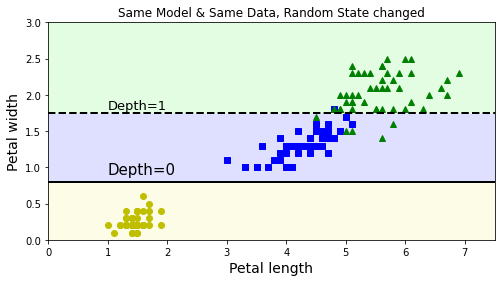

In [22]:
plt.figure(figsize=(8,4))
plot_decision_boundry(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
plt.title("Same Model & Same Data, Random State changed")
plt.show()

### Regularization using min_samples_leaf

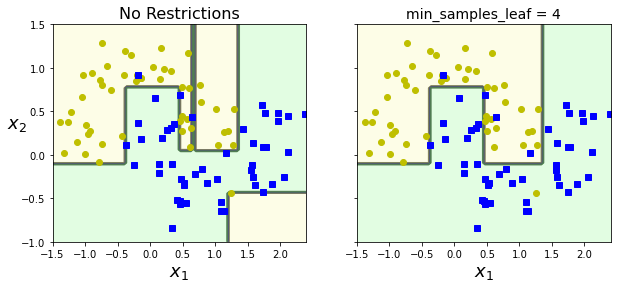

In [24]:
from sklearn.datasets import make_moons

Xm , ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundry(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No Restrictions", fontsize=16)

plt.sca(axes[1])
plot_decision_boundry(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

> Note: Rotating dataset also leads to completely different decision boundry  
<br>

## Regression

In [25]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

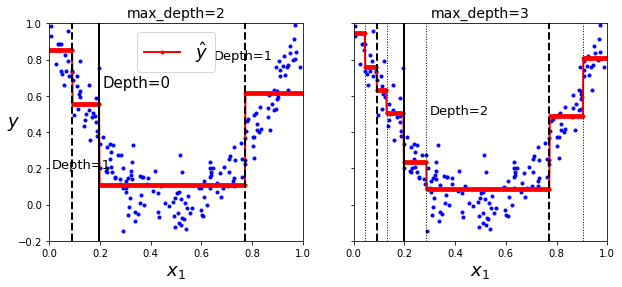

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)

tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

def plot_regression_predictions(tree_reg, X, y, axes=[0 ,1 , -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation = 0)
        
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    
fig,axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)

for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
    
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

Notice how predicted value for each region is always average target value of the instances in that region. Algorithm splits each region in a way that makes most of training instances as close as possible to that predicted value.

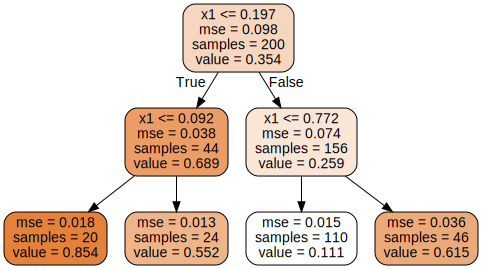

In [30]:
export_graphviz(
    tree_reg1,
    out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

- In this tree, instead of predicting classes, we predict values for each node.  
- Suppose we want to make prediction for $x_1 = 0.6$, we traverse tree starting from root and eventually reach the leaf that predicts value = 0.111.  
- This prediction is simply average target value of 110 training instances to this leaf node. The prediction results in a Mean Squared Error MSE = 0.015 over those 110 instances.  

Now the CART algorithm instead of trying to splitting training set to minimize impurity, it now tries to split the training set in a way that minimizes the MSE.  
> **CART Cost Function:**  
>$J(k, t_k) = \frac{m_{left}}{m} * MSE_{left} + \frac{m_{right}}{m} * MSE_{right}$  <br><br>
> Where, $MSE_{node} = \sum\limits_{i \in node} (\hat{y} - y^{(i)})^2 $  <br><br>
> $\hat{y}_{node} = \frac{1}{m_{node}}  \sum\limits_{i \in node} y^{(i)}$

**Note:**  
- Since decision boundries are  orthogonal (all perpendicular to the axis), DCT is sensitive to training set rotation. One way to limit the problem is to use PCA which often results in better orientation of the training data.
- DCT are sensitive to small variations in training data.
- It is stochastic training algorithm  

<br>
Exercise: train and fine-tune a Decision Tree for the moons dataset.

a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).

In [32]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [34]:
# b. Split it into a training set and a test set using train_test_split().
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

In [35]:
#Finding good hyper parameter values for classifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes' : list(range(2,100)),
    'min_samples_split': [2,3,4]
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42) , params, verbose=1, cv=3)

grid_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

d. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

In [36]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [37]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test,y_pred )

0.8695

Exercise: Grow a forest.

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's ShuffleSplit class for this

In [38]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [40]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.8054499999999999

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's mode() function for this). This gives you majority-vote predictions over the test set.

In [41]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [42]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [43]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872